In [1]:
import pandas as pd
column_names = ['BI-RADS_assessment', 'age', 'shape', 'margin', 'density', 'severity']
raw_data = pd.read_csv("mammographic_masses.data.txt", na_values = ['?'], names = column_names)
raw_data.head()

,BI-RADS_assessment,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [2]:
raw_data.describe()

,BI-RADS_assessment,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [3]:
raw_data.dropna(inplace=True)
raw_data.describe()

,BI-RADS_assessment,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [4]:
import numpy as np
all_features = list(raw_data.columns[1:5])
print(all_features)
features_non_scaled = raw_data[all_features]
classes = raw_data['severity']

['age', 'shape', 'margin', 'density']


In [5]:
from sklearn.preprocessing import StandardScaler

features_non_scaled = np.array(features_non_scaled, np.float32)
classes = np.array(classes)

scaler = StandardScaler()
scaler.fit(features_non_scaled)
features = scaler.transform(features_non_scaled)

from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size = 0.25, random_state=1515)

In [6]:
print(X_train[2])
X_train.data.shape

[-0.39432248  0.17563638  0.11923341  0.24046607]


(622, 4)

In [7]:
X_test.data.shape

(208, 4)

In [8]:
y_train.data.shape

(622,)

# Decision Tree

In [9]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.int` is a deprecated alias')
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.float` is a deprecated alias')
filterwarnings(action='ignore', category=FutureWarning, message='The default value of gamma will change')



from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.7980769230769231

In [10]:
scores = cross_val_score(clf, features, classes, cv=10)
print(scores)
print(scores.mean())

[0.75       0.78571429 0.85714286 0.79518072 0.86746988 0.69879518
 0.81927711 0.76829268 0.86585366 0.74390244]
0.7951628814911212


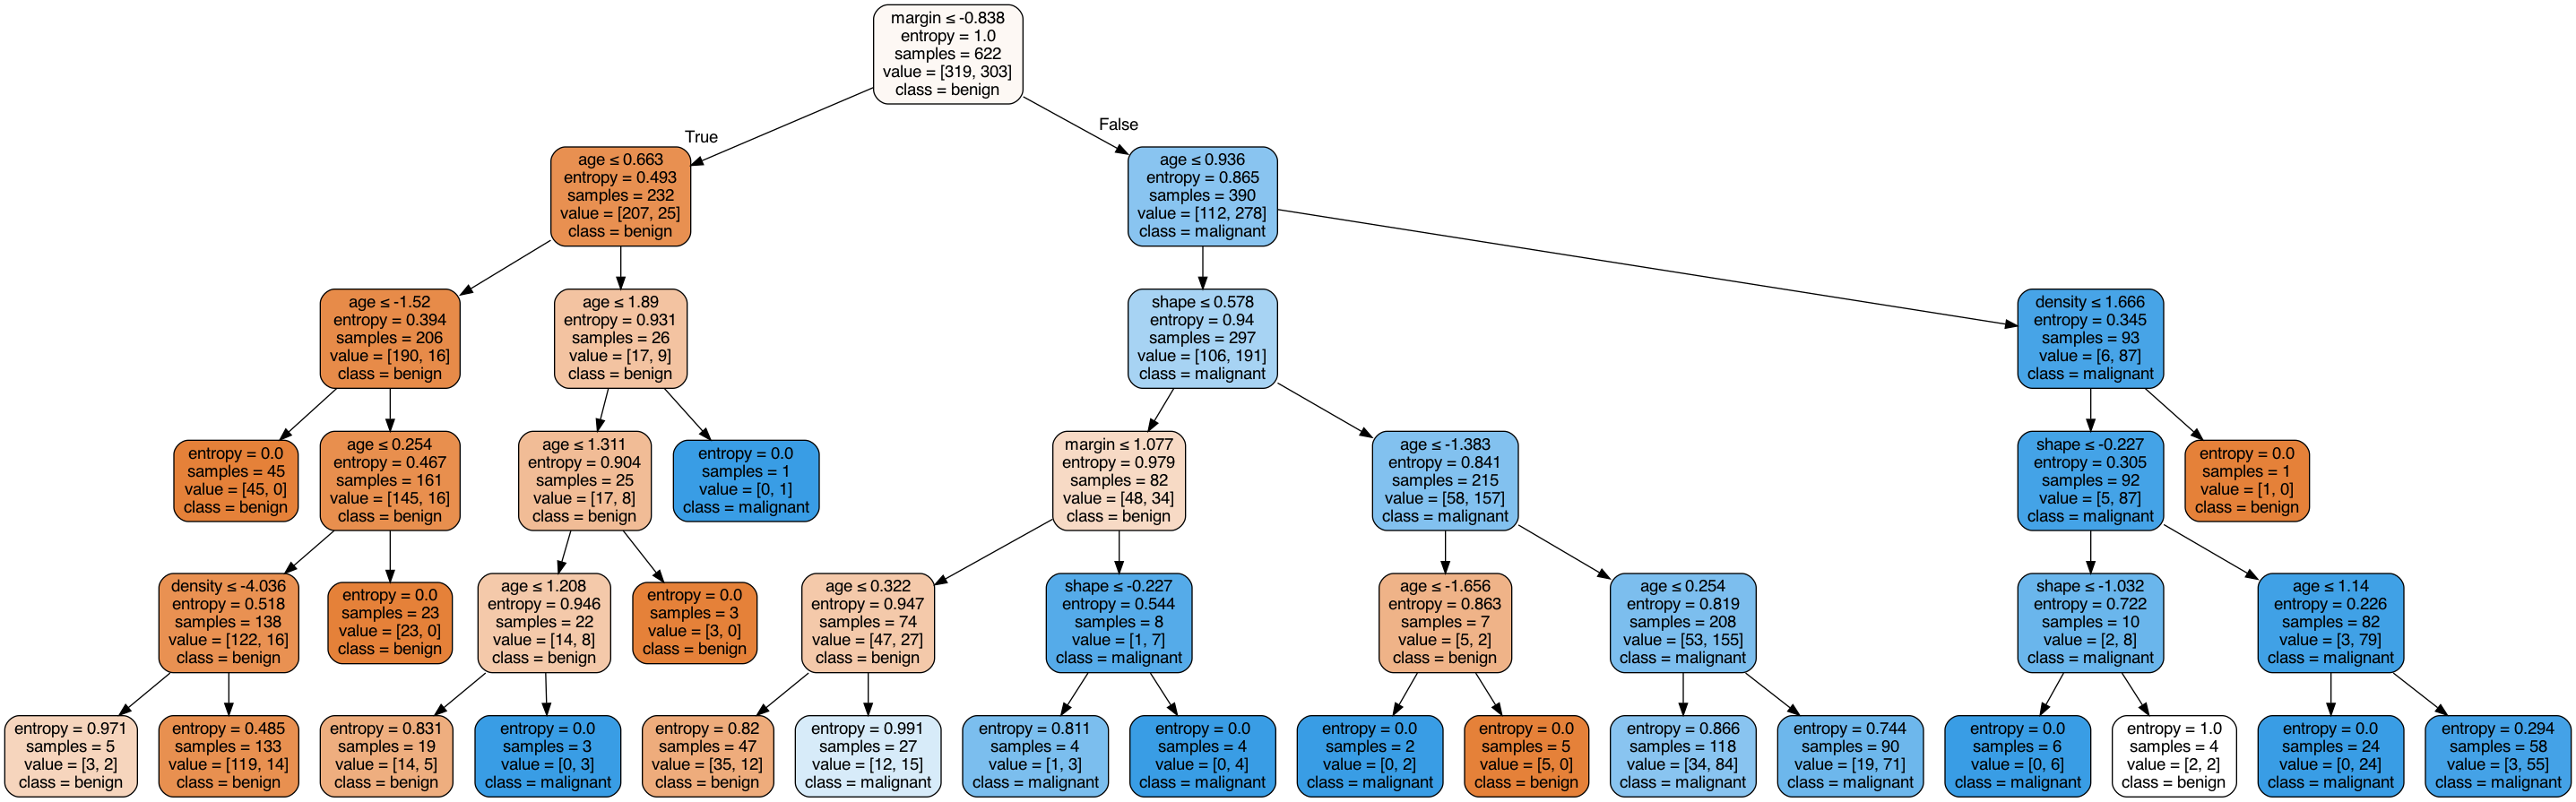

In [11]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, filled=True, 
                     rounded=True, special_characters=True, 
                     feature_names=all_features, class_names=['benign','malignant'])  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, n_estimators=25, criterion="entropy",)

In [13]:
scores = cross_val_score(clf, features, classes, cv=10)
print(scores.mean())

0.7988357611631194


# SVM

In [14]:
from sklearn import svm
kernel = ["linear", "poly", "rbf", "sigmoid"]

for i in range(len(kernel)):
    clf = svm.SVC(kernel=kernel[i], C=1)
    scores = cross_val_score(clf, features, classes, cv=10)
    print ("Kernel:",kernel[i], "Accuracy Score:", scores.mean())

Kernel: linear Accuracy Score: 0.7964988875362076
Kernel: poly Accuracy Score: 0.792753942599667
Kernel: rbf Accuracy Score: 0.8012023704574396
Kernel: sigmoid Accuracy Score: 0.7363250913059904


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.8028846153846154

In [16]:
for i in range(2,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(neigh, features, classes, cv=10)
    print('Number of neighbors:', i,'Accuracy Score:', scores.mean())

Number of neighbors: 2 Accuracy Score: 0.684149489945846
Number of neighbors: 3 Accuracy Score: 0.7553422750234386
Number of neighbors: 4 Accuracy Score: 0.7349016274155857
Number of neighbors: 5 Accuracy Score: 0.7747803058925598
Number of neighbors: 6 Accuracy Score: 0.7637777591201041
Number of neighbors: 7 Accuracy Score: 0.7916351818423519
Number of neighbors: 8 Accuracy Score: 0.7759560891650226
Number of neighbors: 9 Accuracy Score: 0.7928400011194605
Number of neighbors: 10 Accuracy Score: 0.7806595720862544
Number of neighbors: 11 Accuracy Score: 0.7927382001875096
Number of neighbors: 12 Accuracy Score: 0.7758539384016905
Number of neighbors: 13 Accuracy Score: 0.7807326868449407
Number of neighbors: 14 Accuracy Score: 0.7855372710353609
Number of neighbors: 15 Accuracy Score: 0.785493891944083
Number of neighbors: 16 Accuracy Score: 0.7806459286623848
Number of neighbors: 17 Accuracy Score: 0.7866850677973216
Number of neighbors: 18 Accuracy Score: 0.7840861704658354
Number 

# Naive Bayes

In [17]:
from sklearn.preprocessing import MinMaxScaler
non_negative_scaler = MinMaxScaler().fit(features_non_scaled)
non_negative_features = non_negative_scaler.transform(features_non_scaled)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
scores = cross_val_score (clf, non_negative_features, classes, cv=10)
print(non_negative_features)
print (scores.mean())

[[0.6282052  0.6666666  1.         0.6666666 ]
 [0.51282054 1.         1.         0.6666666 ]
 [0.12820514 0.         0.         0.6666666 ]
 ...
 [0.5897436  1.         1.         0.6666666 ]
 [0.61538464 1.         1.         0.6666666 ]
 [0.5641026  0.6666666  0.5        0.6666666 ]]
0.7844055665169388


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=10).fit(features, classes)
clf.score(features, classes)

0.810843373493976

# Neural Network

In [66]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [67]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss="binary_crossentropy", optimizer = "rmsprop", metrics=["accuracy"])
model.fit(X_train, y_train,
          batch_size=16,
          epochs=10,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 622 samples, validate on 208 samples
Epoch 1/10
622/622 - 1s - loss: 0.5927 - accuracy: 0.7556 - val_loss: 0.5273 - val_accuracy: 0.7933
Epoch 2/10
622/622 - 0s - loss: 0.4906 - accuracy: 0.8055 - val_loss: 0.4798 - val_accuracy: 0.7885
Epoch 3/10
622/622 - 0s - loss: 0.4571 - accuracy: 0.8119 - val_loss: 0.4712 - val_accuracy: 0.7885
Epoch 4/10
622/622 - 0s - loss: 0.4471 - accuracy: 0.8167 - val_loss: 0.4695 - val_accuracy: 0.7885
Epoch 5/10
622/622 - 0s - loss: 0.4428 - accuracy: 0.8167 - val_loss: 0.4691 - val_accuracy: 0.7885
Epoch 6/10
622/622 - 0s - loss: 0.4412 - accuracy: 0.8167 - val_loss: 0.4704 - val_accuracy: 0.7885
Epoch 7/10
622/622 - 0s - loss: 0.4398 - accuracy: 0.8199 - val_loss: 0.4712 - val_accuracy: 0.7933
Epoch 8/10
622/622 - 0s - loss: 0.4393 - accuracy: 0.8183 - val_loss: 0.4701 - val_accuracy: 0.7885
Epoch 9/10
622/622 - 0s - loss: 0.4380 - accuracy: 0.8199 - val_loss: 0.4698 - val_accuracy: 0.7933
Epoch 10/10
622/622 - 0s - loss: 0.4374 - accuracy: 0.